<a href="https://colab.research.google.com/github/patience2121/mental-health-chatbot/blob/main/Can_an_Intelligent_Chatbot_Provide_Effective_Mental_Health_Support_Using_Natural_Language_Processing%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing neccessary libraries
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import pandas as pd
from tensorflow.keras.optimizers.legacy import SGD

In [3]:
# Load dataset from CSV file
dataset = pd.read_csv('Mental_Health_FAQ.csv')

In [4]:
dataset.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [5]:
# Extract questions, answers, and question IDs from the dataset
questions = dataset['Questions'].tolist()
answers = dataset['Answers'].tolist()
question_ids = dataset['Question_ID'].tolist()

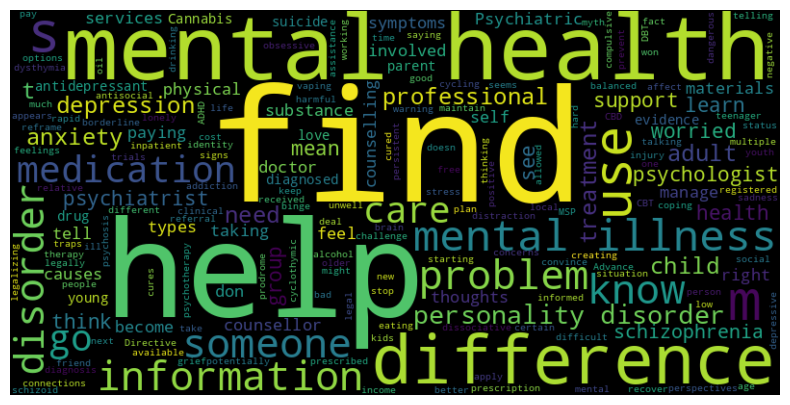

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'questions' is a list of strings containing the questions in your dataset
text = ' '.join(questions)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

In [7]:
pip install nltk


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# Perform processing similar to the original code
documents = []
words = []
classes = []
ignore_words = ['?', '!']

for i in range(len(questions)):
    question = questions[i]
    answer = answers[i]
    question_id = question_ids[i]

    # Tokenize each word
    w = nltk.word_tokenize(question)
    words.extend(w)
    # Add documents to the corpus
    documents.append((w, question_id))

    # Add to the classes list
    if question_id not in classes:
        classes.append(question_id)

lemmatizer = WordNetLemmatizer()
# Lemmatize and lowercase each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# Sort classes
classes = sorted(list(set(classes)))
# Print information about the documents, classes, and words
print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lemmatized words", words)

98 documents
98 classes [1030153, 1043721, 1155199, 1259439, 1337085, 1511075, 1546812, 1585622, 1590140, 1619387, 1667863, 1706961, 1833460, 1896541, 1898078, 2009922, 2110618, 2115228, 2176317, 2447683, 2553795, 2554141, 2612846, 2746837, 2884887, 2903196, 2973656, 3055896, 3166337, 3221856, 3268009, 3284724, 3340726, 3388962, 3393534, 3597720, 3839472, 4031860, 4134858, 4181750, 4194958, 4197817, 4200873, 4211025, 4283807, 4294616, 4352464, 4373204, 4759773, 4816493, 4824231, 4893447, 4925221, 4962901, 5215843, 5343181, 5640861, 5778437, 5819325, 5981663, 6062232, 6085633, 6167248, 6361820, 6521784, 6623577, 6779222, 6851366, 6869967, 6981545, 7009409, 7069853, 7535002, 7657263, 7728364, 7760466, 7807643, 7984793, 7995219, 8022026, 8471978, 8612349, 8690253, 8904276, 8927672, 9020440, 9045344, 9049618, 9100298, 9167296, 9178453, 9250044, 9434130, 9539480, 9541219, 9630578, 9676742, 9679704]
259 unique lemmatized words ["''", "'m", "'s", '(', ')', ',', '.', '19+', '25', '``', 'a', 'a

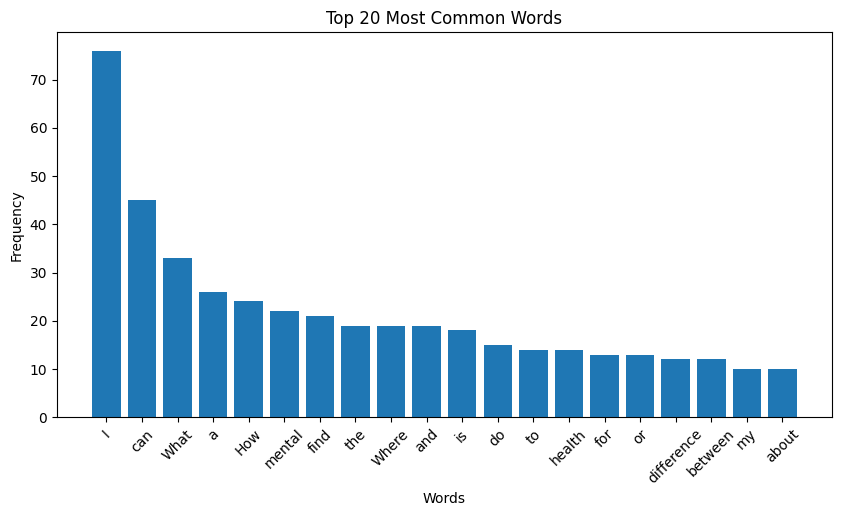

In [13]:
from collections import Counter

# Assuming 'questions' is a list of question texts in your dataset
word_counts = Counter()
for question in questions:
    words = question.split()
    word_counts.update(words)

# Select the top N most common words
top_n = 20
common_words = dict(word_counts.most_common(top_n))

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(common_words.keys(), common_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Words')
plt.xticks(rotation=45)
plt.savefig('commonwords.png')
plt.show()

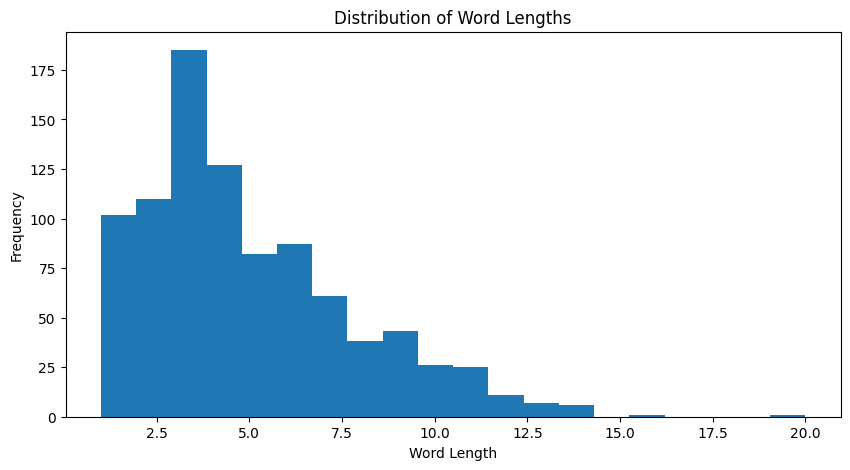

In [14]:
# Assuming 'questions' is a list of question texts in your dataset
word_lengths = [len(word) for question in questions for word in question.split()]

# Plotting the histogram
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths')
plt.savefig('wordlength.png')
plt.show()

In [15]:
# Create our training data
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [16]:
# Shuffle and convert to numpy array
random.shuffle(training)
training = np.array(training, dtype=object)

In [17]:
# Create train and test lists
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")

Training data created


In [18]:
# Create model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))